In [30]:
from insta_crawling import crawling_start
import urllib
import os
import io
from os import walk

In [21]:
df = crawling_start('오뎅', 2, headless=False, mongo_save=0)
df.tail(5)

id를 입력하세요: yeejun90
password를 입력하세요: ········


,hash_tag,image_url
49,"#옥수역떡볶이,#튀김,#순대,#포장마차떡볶이,#오뎅,#여기가맛집,#어묵,#떡볶이,#...",https://scontent-ssn1-1.cdninstagram.com/v/t51...
50,"#안먹아기,#노래가절로,#15개월29일아기,#모짜렐라소세지핫도그,#엄마밥도잘먹어주라...",https://scontent-ssn1-1.cdninstagram.com/v/t51...
51,"#오오티디,#아시안카지노,#널스타그램,#행복한하루,#라떼아트,#좋아요꾹,#육아맘일상...",https://scontent-ssn1-1.cdninstagram.com/v/t51...
52,"#떡볶이,#먹부림스타그램,#ddeokbokki,#순대모듬볶음,#호떡,#저녁,#먹스타...",https://scontent-ssn1-1.cdninstagram.com/v/t51...
53,"#아빠,#다이어트계정,#동성로맛집,#야구,#섹스밤,#여자자위,#여행,#식스팩,#한강...",https://scontent-ssn1-1.cdninstagram.com/v/t51...


In [22]:
print(df.iloc[20]['image_url'])

https://scontent-ssn1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c120.0.720.720a/s640x640/94261117_217564799475970_1704745025451870145_n.jpg?_nc_ht=scontent-ssn1-1.cdninstagram.com&_nc_cat=110&_nc_ohc=Mz2-pb71ZVYAX_RcWxc&oh=676fd9c05f3eaa275f73230a3674ed54&oe=5ECB6261


In [89]:
import urllib
import os

if not os.path.exists('./insta_img'):
    os.mkdir('insta_img')
for index, row in df.iterrows():
    urllib.request.urlretrieve(
        row['image_url'], './insta_img/insta_img_{:02d}.png'.format(index))

In [90]:
df.iloc[10]['image_url']

'https://scontent-ssn1-1.cdninstagram.com/v/t51.2885-15/e35/93953163_162252765112874_3425989181317445086_n.jpg?_nc_ht=scontent-ssn1-1.cdninstagram.com&_nc_cat=102&_nc_ohc=J6UBg2ee9GEAX8PBU1A&oh=ed02e7e375bba9ee7d956fcfb5aab09c&oe=5ECA5F50'

In [91]:
# parts = urllib.parse.urlparse(df.iloc[11]['image_url'])

In [92]:
# parts.query

In [134]:
# 유해성콘텐츠 감지 api는 유해 게시물을 정확히 잡아내지 못한다 (ex. 사진에 글만 있는 경우)
from google.cloud import vision
from google.cloud.vision import types
import urllib
import os
import io
from os import walk


def spam_check():
    os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/song-yeejun/Desktop/Fastcampus/dss01/google_vision_key/vision_key.json'
    client = vision.ImageAnnotatorClient()

    file_list = []
    for (dirpath, dirnames, filenames) in walk('./insta_img'):
        file_list.extend(filenames)
    file_list.sort()
    file_list

    img_words = []
    for index, each_file in enumerate(file_list):
        with io.open('./insta_img/{}'.format(each_file), 'rb') as image_file:
            content = image_file.read()
        image = vision.types.Image(content=content)
        response = client.text_detection(image=image)
        texts = response.text_annotations

        if len(texts) > 0:
            img_words.append(('{:02}'.format(index), texts[0].description))
        else:
            img_words.append(('{:02}'.format(index), ""))

    return img_words

In [135]:
arr = spam_check()

In [136]:
arr

[('00', '1000\n45\n'),
 ('01', ''),
 ('02', ''),
 ('03',
  '성인출장삼\n섹타임 출장잡\n최고의 서비스!!\n이쁜이들 항시대기중!!!\n100% 안전보장!!!\nwww.stime79.com\n예약카톡: A H 2 68\n'),
 ('04', ''),
 ('05', ''),
 ('06', "2대를 이어 정성을 다하는.00\n'촬맥떡볶ㅇ\n리기소문 특허 0113123\n본점 756-75\n"),
 ('07', ''),
 ('08', ''),
 ('09', ''),
 ('10',
  '성인출장삼\n섹타임 출장잡\n최고의 서비스!!\n이쁜이들 항시대기중!!!\n100% 안전보장!!!\nwww.stime79.com\n예약카톡: A H 2 68\n'),
 ('11', ''),
 ('12',
  '19금 성인\n출장의사\n>섹타임\nwww.stime79.com\n+ 타임- 15만원\n+ 타임\n25만원\n풀 +타임\n35만원.,\n예약카톡:A,H 2 68\n롱\n'),
 ('13',
  '어어.\n백보라잖아?\n오다주웠다\n꿀 호떡\n1개 700원\n3개 2,000원\n1.500원\n소세지 호떡\n창깨 호떡\n세개 1.200원\n3개 3,500원\n2,0009\n아이스크림 호떡\n1,500원\n'),
 ('14', ''),
 ('15', ''),
 ('16', 'WWW.MRSEX5.COM\n러브출장샵\n상담카톡:TM5658\n'),
 ('17', ''),
 ('18', '전국출장\n카톡:RC267\nwwW.RC2776.COM\n'),
 ('19', ''),
 ('20', ''),
 ('21', ''),
 ('22', 'UNG\n'),
 ('23', ''),
 ('24', ''),
 ('25', ''),
 ('26', ''),
 ('27', ''),
 ('28', ''),
 ('29', 'odeng\n'),
 ('30', 'ABSOLUT\n'),
 ('31', ''),
 ('32', ''),
 ('33', ''),
 ('34',

In [132]:
spam_words = ['성인출장삼', '섹타임 출장잡', '예약카톡', '이쁜이들 항시대기중!!!',
              '성인', '출장의사', '19금 성인', '전국출장', '러브출장샵', '상담카톡', '섹타 임', '출장마사지']

In [143]:
for index, words in arr:
    check = [each_word in spam_words for each_word in words.split('\n')]
    if True in check:
        print(index)
    

03
10
12
16
18
36
45
46
51
53


In [93]:
from os import walk

file_list = []
for (dirpath, dirnames, filenames) in walk('./insta_img'):
    file_list.extend(filenames)

In [95]:
# file_list.sort()
# file_list

In [130]:
with io.open('./insta_img/{}'.format('insta_img_18.png'), 'rb') as image_file:
    content = image_file.read()

image = vision.types.Image(content=content)
response = client.safe_search_detection(image=image)
safe = response.safe_search_annotation

In [131]:
safe

adult: UNLIKELY
spoof: LIKELY
medical: UNLIKELY
violence: UNLIKELY
racy: VERY_LIKELY

In [19]:
# from google.cloud import storage

# # If you don't specify credentials when constructing the client, the
# # client library will look for credentials in the environment.
# storage_client = storage.Client()

# # Make an authenticated API request
# buckets = list(storage_client.list_buckets())
# print(buckets)

In [45]:
df.values[0]

array(['#흑당버블티, #엄마, #허니브레드, #먹방, #마스크구매, #봄, #일상, #좋반, #좋아요, #첫줄, #추워요, #커피, #빵, #카페, #맴찢, #수요일, #집앞, #요거프레소, #힐링'],
      dtype=object)

In [46]:
df.values[0][0].split(',')

['#흑당버블티',
 ' #엄마',
 ' #허니브레드',
 ' #먹방',
 ' #마스크구매',
 ' #봄',
 ' #일상',
 ' #좋반',
 ' #좋아요',
 ' #첫줄',
 ' #추워요',
 ' #커피',
 ' #빵',
 ' #카페',
 ' #맴찢',
 ' #수요일',
 ' #집앞',
 ' #요거프레소',
 ' #힐링']

In [47]:
df.values[35][0]

'#용곡동, #성성동, #단체주문, #백석동, #마녀, #앙마, #성정동, #소금커피, #흑당버블티, #봉명동, #삼성, #햄치즈, #원성동, #차암동, #감사합니다, #두정동카페, #신부동, #불당동, #대만샌드위치천안본점, #신속정확한배달'

In [48]:
df.values[36][0].split(', ')

['#소통,#foodstagram,#흑당버블티,#선팔하면맞팔,#맛스타그램,#foodie,#먹스타맞팔,#맞팔,#먹스타그램,#타이거슈가,#food,#서현역,#흑당밀크티']

In [90]:
hash_tags = []
for each_row in df.values:
    hash_tags.extend(each_row[0].split(','))
hash_tags = [each_tag.strip() for each_tag in hash_tags]

In [91]:
len(hash_tags)

730

In [92]:
hash_tags_set = set(hash_tags)
len(hash_tags_set)

507

In [96]:
hash_tags = list(filter(lambda ele: ele != '', hash_tags))

In [97]:
import collections

hash_tag_dict = collections.Counter(hash_tags)
hash_tag_dict

Counter({'#흑당버블티': 46,
         '#엄마': 1,
         '#허니브레드': 2,
         '#먹방': 2,
         '#마스크구매': 1,
         '#봄': 3,
         '#일상': 4,
         '#좋반': 2,
         '#좋아요': 5,
         '#첫줄': 1,
         '#추워요': 1,
         '#커피': 6,
         '#빵': 1,
         '#카페': 9,
         '#맴찢': 1,
         '#수요일': 1,
         '#집앞': 1,
         '#요거프레소': 2,
         '#힐링': 1,
         '#커피는이디야': 1,
         '#물금카페': 1,
         '#200422': 1,
         '#이디야카페': 1,
         '#양산부산대병원': 1,
         '#바닐라라떼': 1,
         '#물금커피': 1,
         '#봄딸기라떼': 1,
         '#범어카페': 1,
         '#이디야커피': 1,
         '#양산카페': 1,
         '#이디야양부대점': 1,
         '#범어커피': 1,
         '#양산부산대학병원': 1,
         '#양산커피': 1,
         '#이디야양산부산대병원점': 1,
         '#모닝커피': 2,
         '#이디야': 2,
         '#양산이디야': 1,
         '#이디야뽀로로': 1,
         '#메이븐커피스토어': 2,
         '#고대스터디카페': 2,
         '#오렌지착즙': 2,
         '#법후': 2,
         '#고대카페': 2,
         '#종암동': 2,
         '#라떼아트': 2,
         '#법후라떼': 2,
     

In [98]:
hash_tags_top10 = hash_tag_dict.most_common()[:10]

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
f_path = "/Library/Fonts/AppleGothic.ttf"
rc('font', family='AppleGothic')

hash_tags_df = pd.DataFrame(hash_tags_top10, columns=['hash_tag', 'count'])
hash_tags_df

,hash_tag,count
0,#흑당버블티,46
1,#카페,9
2,#먹스타그램,8
3,#커피,6
4,#타이거슈가,6
5,#버블티,6
6,#좋아요,5
7,#맛스타그램,5
8,#소통,5
9,#일상,4


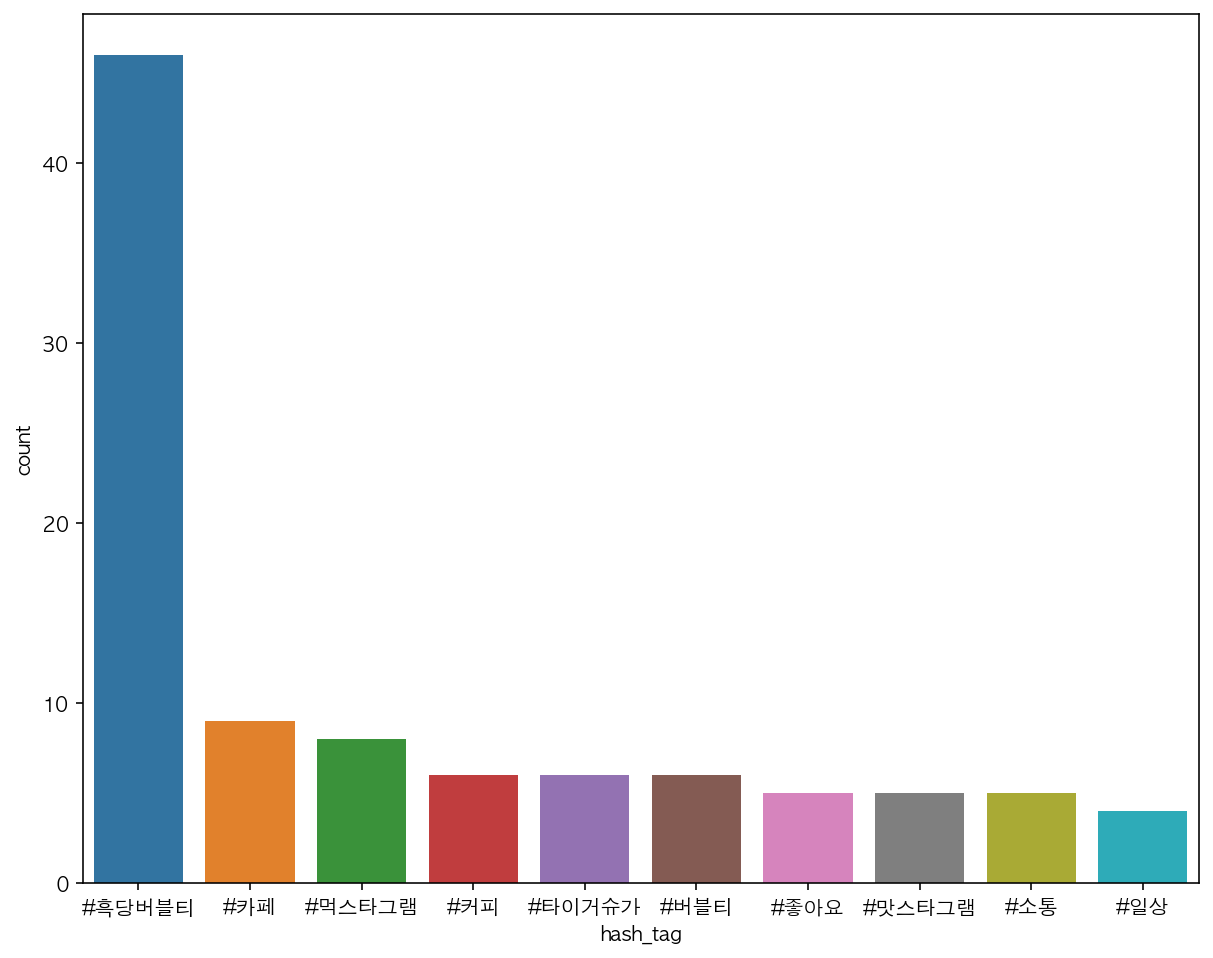

In [134]:
plt.figure(figsize=(10, 8))

sns.barplot(x='hash_tag', y='count', data=hash_tags_df)

In [119]:
# [each_item[0] for each_item in hash_tags_top10]